In [0]:
pip install pyspark

     |████████████████████████████████| 217.8MB 58kB/s 
     |████████████████████████████████| 204kB 41.0MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257927 sha256=561689d49837521c5bf56351b150305ff5585b85813f63cc26c87e80f5bf4b2b
  Stored in directory: /root/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark


In [0]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *

In [0]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

In [0]:
sc = SparkContext()
spark = SparkSession(sc)
sqlContext = SQLContext(sc)

In [0]:
df="s3://hiqba16007/devicestatus.txt"

In [0]:
def mapper(line):
    fields = line.split('\t')
    return Row(field1=float(fields[0]), field2=float(fields[1]), field3=StringType(fields[2]),field4=StringType(field[3]),field5=StringType(field[4]))

lines = spark.sparkContext.textFile(df)
df = lines.map(mapper)


In [0]:
schemaDf = spark.createDataFrame(df).cache()

In [0]:
schemaDf.take(1)

[(33.6894754264, -117.543308253, '2014-03-15:10:10:20', 'Sorrento', 'F41L')]

In [0]:
output_bucket="s3://hiqba16007/schemaDf"

In [0]:
df.rdd.coalesce(1).saveAsTextFile(output_bucket)

In [0]:
sc.textFile(output_bucket).take(10)

["Row(latitude=33.689476013183594, longtitude=-117.54330444335938, date='2014-03-15 10:10:20', manufacturer='Sorrento', model_name='F41L')",
 "Row(latitude=37.43210983276367, longtitude=-121.48503112792969, date='2014-03-15 10:10:20', manufacturer='MeeToo', model_name='1.0')",
 "Row(latitude=39.437889099121094, longtitude=-120.93898010253906, date='2014-03-15 10:10:20', manufacturer='MeeToo', model_name='1.0')",
 "Row(latitude=39.36351776123047, longtitude=-119.40033721923828, date='2014-03-15 10:10:20', manufacturer='Sorrento', model_name='F41L')",
 "Row(latitude=33.19135665893555, longtitude=-116.4482421875, date='2014-03-15 10:10:20', manufacturer='Ronin', model_name='Novelty')",
 "Row(latitude=33.834354400634766, longtitude=-117.33000183105469, date='2014-03-15 10:10:20', manufacturer='Sorrento', model_name='F41L')",
 "Row(latitude=37.380393981933594, longtitude=-121.84075927734375, date='2014-03-15 10:10:20', manufacturer='Sorrento', model_name='F33L')",
 "Row(latitude=34.18410491

In [0]:
df=pd.DataFrame(schemaDf)

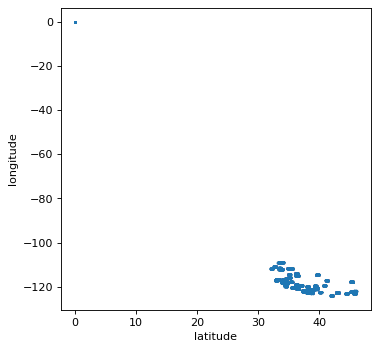

In [0]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(df["latitude"],df["longitude"],alpha=.5,marker='o',s=.09)
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.show()
